In [116]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os

In [9]:
path_base = '~/Documents/data'
path_output = os.path.join(path_base, 'output_memmap_trust_real_0_1094.dat')
expanded_path_output = os.path.expanduser(path_output)
output_trust = np.memmap(expanded_path_output, shape=(int(1094/2), 2),dtype='float64', mode='r')

output_trust

memmap([[0.63435042, 0.61001099],
        [0.63435042, 0.61001099],
        [0.63435042, 0.61001099],
        ...,
        [0.63017906, 0.58619143],
        [0.63017906, 0.58619143],
        [0.63002417, 0.58707664]])

In [10]:
path_output = os.path.join(path_base, 'output_memmap_stress_real_0_1094.dat')
expanded_path_output = os.path.expanduser(path_output)
output_stress = np.memmap(expanded_path_output, shape=(int(1094/2), 1), dtype='float64', mode='r')

output_stress[0:10]

memmap([[0.56109713],
        [0.56109713],
        [0.56109713],
        [0.56109713],
        [0.56109713],
        [0.56109713],
        [0.56109713],
        [0.56109713],
        [0.56109713],
        [0.5749134 ]])

In [69]:
unique_trust0, ind_unique_trust0 = np.unique(output_trust[:,0], return_index=True)

print(f'Number of unique values of trustworthiness for k=30 is: [{len(np.unique(output_trust[:,0]))}]')
print(sorted(ind_unique_trust0)[:10])

unique_trust1, ind_unique_trust1 = np.unique(output_trust[:,1], return_index=True)
print(f'Number of unique values of trustworthiness for k=300 is: [{len(np.unique(output_trust[:,1]))}]')
print(sorted(ind_unique_trust1)[:10])

unique_stress, ind_unique_stress = np.unique(output_stress, return_index=True)
print(f'Number of unique values of shepard stress: [{len(np.unique(output_stress))}]')
print(sorted(ind_unique_stress)[:10])

print(f'Indices of unique trust_k30 and unique trust_k300 are identical: [{sorted(ind_unique_trust0) == sorted(ind_unique_trust1)}]')
print(f'Indices of unique trust_k30 and unique stress are identical: [{sorted(ind_unique_trust0) == sorted(ind_unique_stress)}]')

Number of unique values of trustworthiness for k=30 is: [93]
[0, 9, 18, 27, 36, 37, 40, 41, 43, 52]
Number of unique values of trustworthiness for k=300 is: [93]
[0, 9, 18, 27, 36, 37, 40, 41, 43, 52]
Number of unique values of shepard stress: [93]
[0, 9, 18, 27, 36, 37, 40, 41, 43, 52]
Indices of unique trust_k30 and unique trust_k300 are identical: [True]
Indices of unique trust_k30 and unique stress are identical: [True]


In [80]:
path_metrics = os.path.join(path_base, 'df_metrics_unique.csv')
df_metrics = pd.read_csv(path_metrics)

df_metrics['trust_k30'] = np.copy(output_trust[:,0])
df_metrics['trust_k300'] = np.copy(output_trust[:,1])
df_metrics['stress'] = np.copy(output_stress)

In [81]:
unique_KL, ind_unique_KL = np.unique(df_metrics['KL_divergence'], return_index=True)
print(f'Number of unique values of KL divergence is: [{len(ind_unique_KL)}]')
print(sorted(ind_unique_KL)[:10])

print(f'Indices of unique trust_k30 and unique KL divergence are identical: [{sorted(ind_unique_trust0) == sorted(ind_unique_KL)}]')

union_ind_unique = list(set(ind_unique_trust0) | set(ind_unique_trust1) | set(ind_unique_KL))
print(f'Length of the indices union is: {len(union_ind_unique)}')
print(sorted(union_ind_unique)[:20])

Number of unique values of KL divergence is: [93]
[0, 9, 18, 27, 36, 37, 40, 41, 43, 52]
Indices of unique trust_k30 and unique KL divergence are identical: [True]
Length of the indices union is: 93
[0, 9, 18, 27, 36, 37, 40, 41, 43, 52, 53, 54, 55, 61, 70, 79, 85, 94, 103, 112]


In [88]:
#if max(union_ind_unique) < len(df_metrics):
df_metrics.iloc[sorted(union_ind_unique)]

,Pipeline_index,Combination,Perplexity,Early_exaggeration,Initial_momentum,Final_momentum,Theta,tSNE_runtime_min,Affinity_runtime_min,KL_divergence,trust_k30,trust_k300,stress
0,pipeline_0,"(65, 4, 0.1, 0.8, 0.25)",65,4,0.1,0.8,0.25,60.081908,12.199162,2.927480,0.634350,0.610011,0.561097
9,pipeline_9,"(65, 4, 0.1, 0.8, 0.5)",65,4,0.1,0.8,0.50,20.741094,12.199162,2.928818,0.634326,0.610626,0.574913
18,pipeline_18,"(65, 4, 0.1, 0.8, 0.75)",65,4,0.1,0.8,0.75,12.027763,12.199162,2.929345,0.633535,0.610758,0.613603
27,pipeline_27,"(65, 4, 0.1, 0.8, 1.0)",65,4,0.1,0.8,1.00,8.201877,12.298686,2.948618,0.631746,0.610583,0.677484
36,pipeline_36,"(65, 11, 0.1, 0.8, 0.25)",65,11,0.1,0.8,0.25,60.704797,12.298686,2.936716,0.634025,0.610069,0.573540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,pipeline_521,"(5, 25, 0.1, 0.8, 0.25)",5,25,0.1,0.8,0.25,57.057928,5.676407,3.811202,0.630201,0.586137,0.589117
522,pipeline_522,"(5, 25, 0.1, 0.9, 0.25)",5,25,0.1,0.9,0.25,57.217464,5.676407,3.812448,0.630011,0.585979,0.592485
530,pipeline_530,"(5, 25, 0.1, 0.8, 0.5)",5,25,0.1,0.8,0.50,19.142100,5.676407,3.812061,0.629938,0.586377,0.583712
539,pipeline_539,"(5, 25, 0.1, 0.8, 0.75)",5,25,0.1,0.8,0.75,10.127468,5.676407,3.823992,0.630179,0.586191,0.558790


In [93]:
cormat = df_metrics.drop(df_metrics.columns[[0,1,7,8]],axis=1).corr()
round(cormat,2)

,Perplexity,Early_exaggeration,Initial_momentum,Final_momentum,Theta,KL_divergence,trust_k30,trust_k300,stress
Perplexity,1.00,-0.28,-0.02,-0.00,-0.03,-0.96,0.63,0.94,0.28
Early_exaggeration,-0.28,1.00,-0.01,-0.00,-0.02,0.22,-0.12,-0.20,-0.38
Initial_momentum,-0.02,-0.01,1.00,-0.01,0.02,0.01,0.00,-0.01,-0.00
Final_momentum,-0.00,-0.00,-0.01,1.00,0.00,-0.00,0.00,0.00,-0.01
Theta,-0.03,-0.02,0.02,0.00,1.00,0.07,-0.15,0.01,0.22
KL_divergence,-0.96,0.22,0.01,-0.00,0.07,1.00,-0.81,-0.99,-0.17
trust_k30,0.63,-0.12,0.00,0.00,-0.15,-0.81,1.00,0.84,-0.18
trust_k300,0.94,-0.20,-0.01,0.00,0.01,-0.99,0.84,1.00,0.15
stress,0.28,-0.38,-0.00,-0.01,0.22,-0.17,-0.18,0.15,1.00


<Axes: >

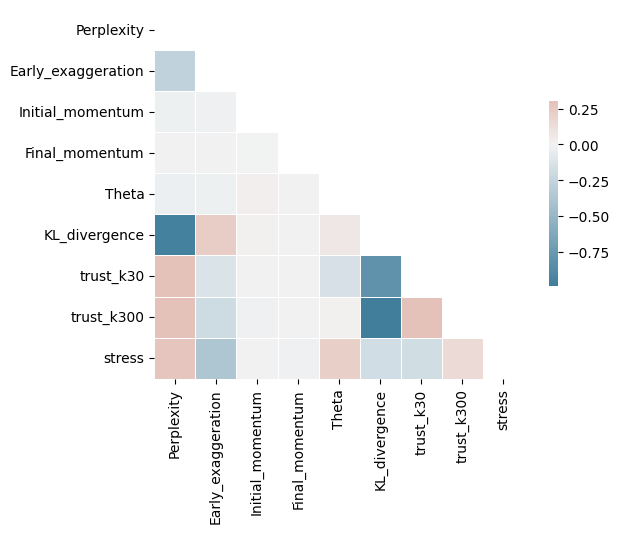

In [99]:
mask = np.triu(np.ones_like(cormat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cormat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: >

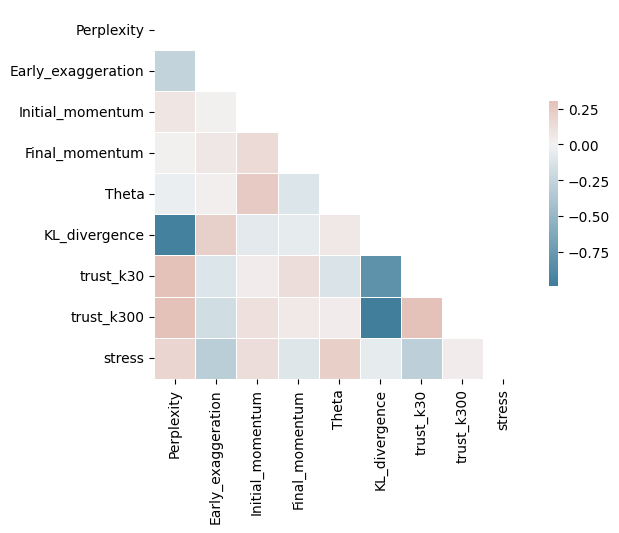

In [101]:
df_metrics_unique = df_metrics.iloc[sorted(union_ind_unique)]

cormat = df_metrics_unique.drop(df_metrics_unique.columns[[0,1,7,8]],axis=1).corr()
round(cormat,2)
mask = np.triu(np.ones_like(cormat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cormat, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [102]:
cormat

,Perplexity,Early_exaggeration,Initial_momentum,Final_momentum,Theta,KL_divergence,trust_k30,trust_k300,stress
Perplexity,1.000000,-0.257433,0.069672,0.010482,-0.034543,-0.959369,0.628503,0.933418,0.174119
Early_exaggeration,-0.257433,1.000000,0.010521,0.058546,0.016283,0.210550,-0.113404,-0.180670,-0.307422
Initial_momentum,0.069672,0.010521,1.000000,0.144891,0.245399,-0.077993,0.028894,0.108783,0.125687
Final_momentum,0.010482,0.058546,0.144891,1.000000,-0.115974,-0.055723,0.124220,0.051967,-0.106458
Theta,-0.034543,0.016283,0.245399,-0.115974,1.000000,0.054805,-0.128930,0.036715,0.217205
KL_divergence,-0.959369,0.210550,-0.077993,-0.055723,0.054805,1.000000,-0.814446,-0.990490,-0.060310
trust_k30,0.628503,-0.113404,0.028894,0.124220,-0.128930,-0.814446,1.000000,0.839556,-0.288477
trust_k300,0.933418,-0.180670,0.108783,0.051967,0.036715,-0.990490,0.839556,1.000000,0.035637
stress,0.174119,-0.307422,0.125687,-0.106458,0.217205,-0.060310,-0.288477,0.035637,1.000000


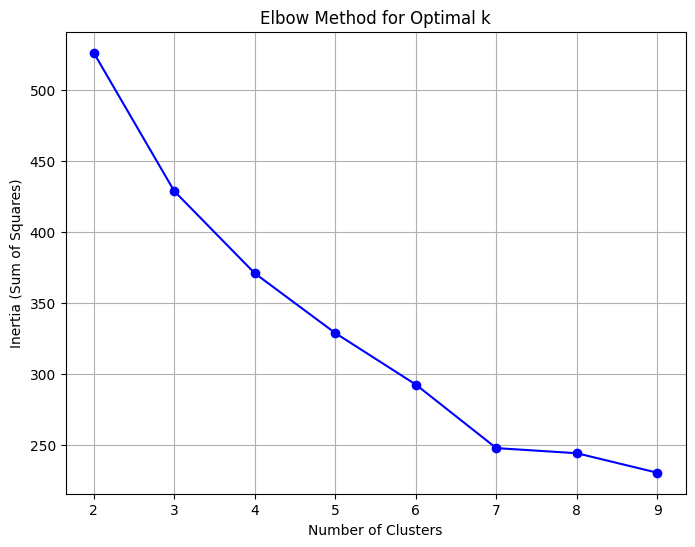

In [110]:
scaler = StandardScaler()
data_for_cluster = df_metrics_unique.drop(df_metrics_unique.columns[[0,1,7,8]],axis=1)
scaled_data = scaler.fit_transform(data_for_cluster)


k_range = range(2, 10)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

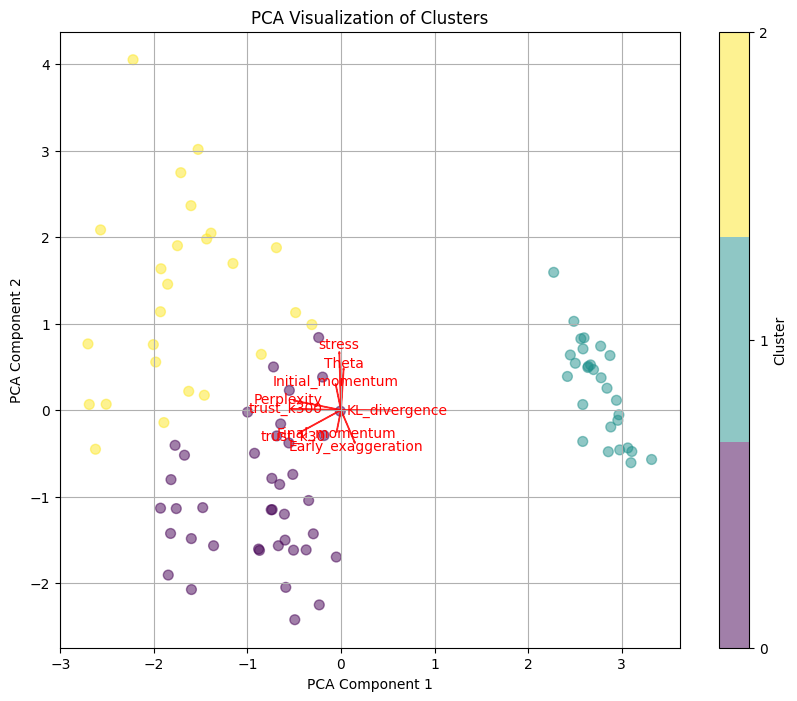

In [135]:
n_clusters = 3  # Adjust this based on your analysis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels back to the original DataFrame
data_for_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
components = pca.components_

# Plotting the PCA results with cluster colors
colors = plt.get_cmap('viridis', n_clusters)
cmap = ListedColormap(colors(np.arange(n_clusters)))
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap=cmap, s=50, alpha=0.5)
plt.title('PCA Visualization of Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, ticks=range(n_clusters), label='Cluster')
plt.grid(True)

# Add biplot arrows
for i, (pc1, pc2) in enumerate(zip(components[0, :], components[1, :])):
    plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.8, width=0.005)
    plt.text(pc1 * 1.15, pc2 * 1.15, data_for_cluster.columns[:-1][i], color='r', ha='center', va='center')

plt.show()

Index(['Perplexity', 'Early_exaggeration', 'Initial_momentum',
       'Final_momentum', 'Theta', 'KL_divergence', 'trust_k30', 'trust_k300',
       'stress'],
      dtype='object')